# Import necessary libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Load the dataset

In [20]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Merge transactions with customers and products

In [21]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Customer Segmentation

In [22]:
customer_features = merged_data.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalValue', 'Quantity']])

# Clustering using KMeans

In [23]:
kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate DB Index

In [24]:
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])

[16]
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print("\nDavies-Bouldin Index:", db_index)

print("\nDavies-Bouldin Index:", db_index)


Davies-Bouldin Index: 0.776661054409607

Davies-Bouldin Index: 0.776661054409607


## Visualization of clusters

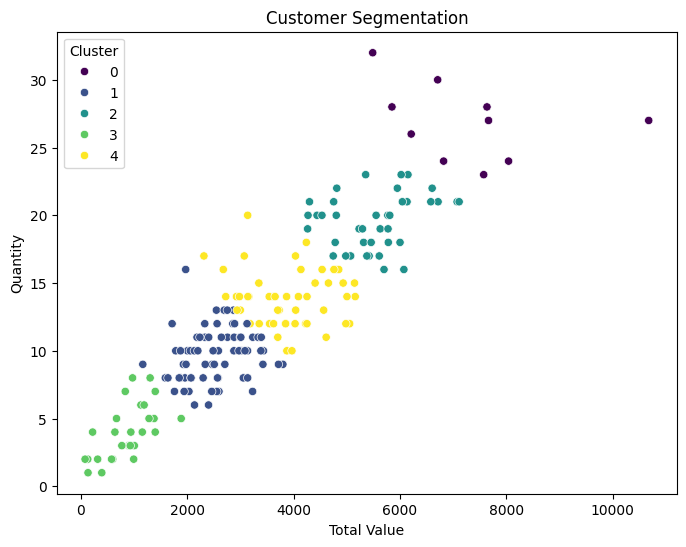

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_features['TotalValue'], y=customer_features['Quantity'], hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()

# Save clustering results

In [26]:
customer_features.to_csv('Customer_Segmentation.csv', index=False)